In [1]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize
from pymoo.factory import get_problem
from pymoode.nsde import NSDE
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival

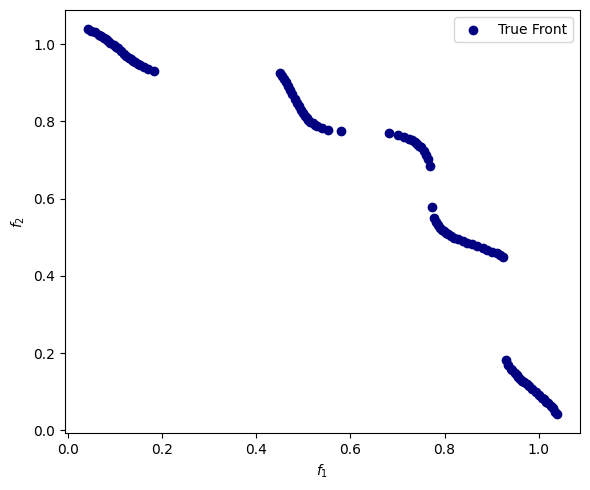

In [2]:
from pymoo.factory import get_problem

problem = get_problem("tnk")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [3]:
problem.__dict__

{'n_var': 2,
 'n_obj': 2,
 'n_constr': 2,
 'data': {'type_var': numpy.float64},
 'xl': array([0.e+00, 1.e-30]),
 'xu': array([3.14159265, 3.14159265]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x2438026d040>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x2438142d880>,
 '_ideal_point': None,
 '_nadir_point': None}

In [4]:
NGEN = 250
POPSIZE = 50
SEED = 5

In [5]:
gde3 = GDE3(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))

res_gde3 = minimize(problem,
                    gde3,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  4.715048981 |  0.293125257 |  0.111518374 |  0.105613683
    3 |     150 |  0.00000E+00 |  2.239766565 |  0.132166317 |  0.073394896 |  0.147096503
    4 |     200 |  0.00000E+00 |  1.812104372 |  0.128780900 |  0.070886727 |  0.151043514
    5 |     250 |  0.00000E+00 |  1.243363937 |  0.113961803 |  0.060980714 |  0.178668746
    6 |     300 |  0.00000E+00 |  0.392474682 |  0.067308578 |  0.027516234 |  0.224883277
    7 |     350 |  0.00000E+00 |  0.143457508 |  0.061323889 |  0.024741594 |  0.233832490
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.059677079 |  0.023450841 |  0.235087041
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.058861308 |  0.022002487 |  0.236011394
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.048349936 |  0.023525304 |  0.251701435

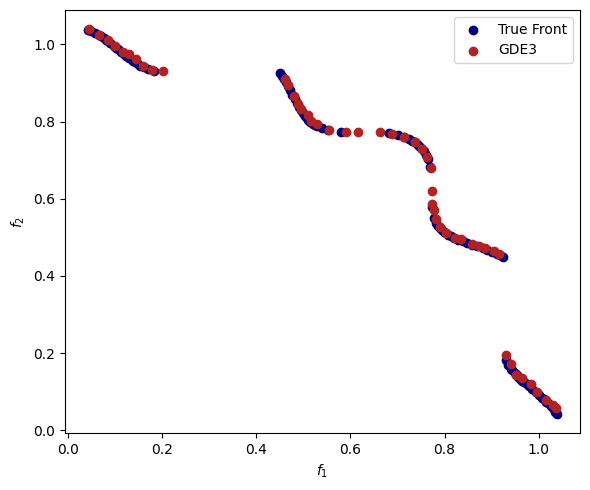

In [6]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [7]:
%%time
nsga2 = NSGA2(pop_size=POPSIZE, survival=RankSurvival(rule="full", crowding_func="cd"))

res_nsga2 = minimize(problem,
                     nsga2,
                     ('n_gen', NGEN),
                     seed=SEED,
                     save_history=True,
                     verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  7.127984090 |  0.400570799 |  0.130381593 |  0.058355110
    2 |     100 |  0.00000E+00 |  1.106762867 |  0.228425412 |  0.125716765 |  0.091586629
    3 |     150 |  0.00000E+00 |  0.144349571 |  0.175572015 |  0.124470936 |  0.126644359
    4 |     200 |  0.00000E+00 |  0.011895983 |  0.116900242 |  0.069973798 |  0.178018403
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.098054676 |  0.066234483 |  0.195146248
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.095291857 |  0.068404740 |  0.200672749
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.084403617 |  0.063174778 |  0.205460493
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.068281484 |  0.048678553 |  0.219078125
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.054688291 |  0.038281526 |  0.233617281
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.048996247 |  0.022037851 |  0.250689231

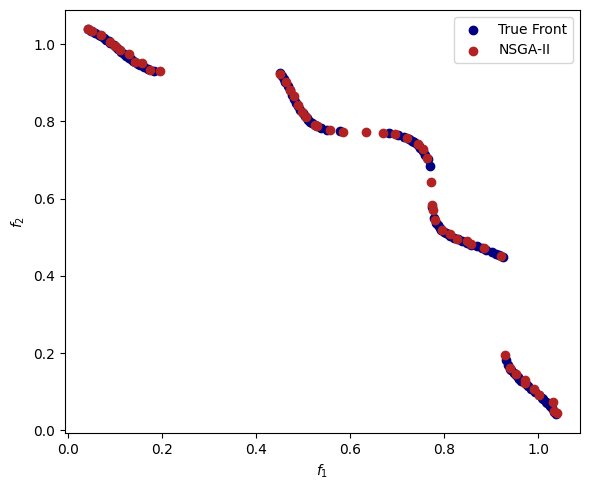

In [8]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [9]:
%%time
nsde = NSDE(pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), repair="bounce-back",
            survival=RankSurvival(rule="full", crowding_func="cd"))
    
res_nsde = minimize(problem,
                    nsde,
                    ('n_gen', NGEN),
                    seed=SEED,
                    save_history=True,
                    verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.778960295 |  0.293125257 |  0.111518374 |  0.105613683
    3 |     150 |  0.00000E+00 |  0.475579668 |  0.276490064 |  0.124959624 |  0.112226251
    4 |     200 |  0.00000E+00 |  0.117164379 |  0.133357243 |  0.061498512 |  0.170625548
    5 |     250 |  0.00000E+00 |  0.006432092 |  0.095567616 |  0.068298918 |  0.204455526
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.059189878 |  0.047885667 |  0.222180324
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.056939484 |  0.046575594 |  0.227852231
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.053623469 |  0.041870275 |  0.229050857
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.049725102 |  0.039198681 |  0.232392872
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.047902365 |  0.034627731 |  0.238583892

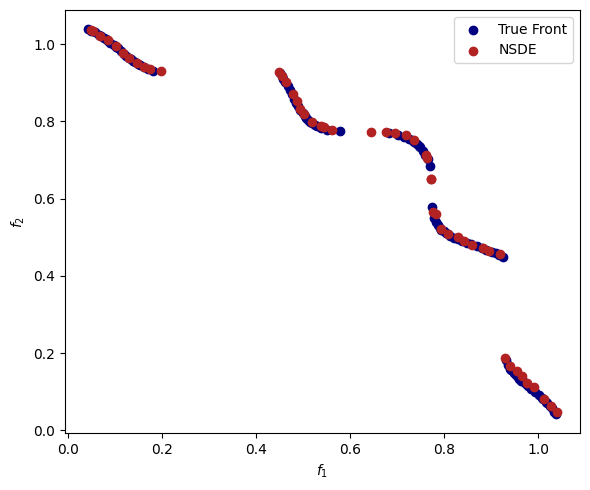

In [10]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()